soup = BeautifulSoup(r.content, 'html5lib')

In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

page = requests.get("https://forecast.weather.gov/MapClick.php?lat=34.0536&lon=-118.2455#.XyFbdJ4zaM8")
Soup = BeautifulSoup(page.content, "html.parser")
print(Soup)

<!DOCTYPE html>

<html class="no-js">
<head>
<!-- Meta -->
<meta content="width=device-width" name="viewport"/>
<link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/><title>National Weather Service</title><meta content="National Weather Service" name="DC.title"><meta content="NOAA National Weather Service National Weather Service" name="DC.description"/><meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/><meta content="" name="DC.date.created" scheme="ISO8601"/><meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/><meta content="weather, National Weather Service" name="DC.keywords"/><meta content="NOAA's National Weather Service" name="DC.publisher"/><meta content="National Weather Service" name="DC.contributor"/><meta content="http://www.weather.gov/disclaimer.php" name="DC.rights"/><meta content="General" name="rating"/><meta content="index,follow" name="robots"/>
<!-- Icons -->
<link href="./images/favicon.ico" rel="shor

In [7]:
print(Soup.find_all("a"))  # prints all the links with that a tag

[<a class="pull-left" href="http://www.noaa.gov" id="header-noaa"><img alt="National Oceanic and Atmospheric Administration" src="/css/images/header_noaa.png"/></a>, <a class="pull-left" href="http://www.weather.gov" id="header-nws"><img alt="National Weather Service" src="/css/images/header_nws.png"/></a>, <a class="pull-right" href="http://www.commerce.gov" id="header-doc"><img alt="United States Department of Commerce" src="/css/images/header_doc.png"/></a>, <a href="http://www.weather.gov">HOME</a>, <a class="dropdown-toggle" data-toggle="dropdown" href="http://www.weather.gov/forecastmaps">FORECAST <span class="caret"></span></a>, <a href="http://www.weather.gov">Local</a>, <a href="http://digital.weather.gov">Graphical</a>, <a href="http://www.aviationweather.gov/">Aviation</a>, <a href="http://www.nws.noaa.gov/om/marine/home.htm">Marine</a>, <a href="http://water.weather.gov/ahps/">Rivers and Lakes</a>, <a href="http://www.nhc.noaa.gov/">Hurricanes</a>, <a href="http://www.spc.n

In [8]:
week = Soup.find(id = "seven-day-forecast-body")
print(week)

<div class="panel-body" id="seven-day-forecast-body">
<div id="seven-day-forecast-container"><ul class="list-unstyled" id="seven-day-forecast-list"><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Today<br/><br/></p>
<p><img alt="Today: Partly sunny, with a high near 62. Calm wind becoming west southwest around 5 mph in the afternoon. " class="forecast-icon" src="newimages/medium/bkn.png" title="Today: Partly sunny, with a high near 62. Calm wind becoming west southwest around 5 mph in the afternoon. "/></p><p class="short-desc">Partly Sunny</p><p class="temp temp-high">High: 62 °F</p></div></li><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Tonight<br/><br/></p>
<p><img alt="Tonight: Patchy fog after 11pm.  Otherwise, mostly cloudy, with a low around 51. West southwest wind around 5 mph becoming calm. " class="forecast-icon" src="newimages/medium/nfg.png" title="Tonight: Patchy fog after 11pm.  Otherwise

In [11]:
items = week.find_all(class_ = "tombstone-container")
print(items[0])

<div class="tombstone-container">
<p class="period-name">Today<br/><br/></p>
<p><img alt="Today: Partly sunny, with a high near 62. Calm wind becoming west southwest around 5 mph in the afternoon. " class="forecast-icon" src="newimages/medium/bkn.png" title="Today: Partly sunny, with a high near 62. Calm wind becoming west southwest around 5 mph in the afternoon. "/></p><p class="short-desc">Partly Sunny</p><p class="temp temp-high">High: 62 °F</p></div>


In [12]:
print(items[0].find(class_ = 'period-name').get_text())

Today


In [13]:
print(items[0].find(class_ = 'period-name').get_text())
print(items[0].find(class_ = 'short-desc').get_text())
print(items[0].find(class_ = 'temp').get_text())

Today
Partly Sunny
High: 62 °F


In [21]:
Period_names = [item.find(class_ = 'period-name').get_text() for item in items]
print(Period_names)

['Today', 'Tonight', 'Wednesday', 'WednesdayNight', 'Thursday', 'ThursdayNight', 'Friday', 'FridayNight', 'Saturday']


In [22]:
Short_description = [item.find(class_ = 'short-desc').get_text() for item in items]
print(Short_description)

['Partly Sunny', 'Patchy Fog', 'Patchy Fogthen Sunny', 'Partly Cloudy', 'Mostly Sunny', 'Slight ChanceRain', 'Slight ChanceShowers', 'Mostly Clear', 'Partly Sunny']


In [23]:
Temperature = [item.find(class_ = 'temp').get_text() for item in items]
print(temperature)

['High: 62 °F', 'Low: 51 °F', 'High: 64 °F', 'Low: 48 °F', 'High: 66 °F', 'Low: 51 °F', 'High: 67 °F', 'Low: 49 °F', 'High: 67 °F']


In [25]:
weather_stuff = pd.DataFrame({"Period":Period_names, "Short Description":Short_description, "Temperature":Temperature})
print(weather_stuff)

           Period     Short Description  Temperature
0           Today          Partly Sunny  High: 62 °F
1         Tonight            Patchy Fog   Low: 51 °F
2       Wednesday  Patchy Fogthen Sunny  High: 64 °F
3  WednesdayNight         Partly Cloudy   Low: 48 °F
4        Thursday          Mostly Sunny  High: 66 °F
5   ThursdayNight     Slight ChanceRain   Low: 51 °F
6          Friday  Slight ChanceShowers  High: 67 °F
7     FridayNight          Mostly Clear   Low: 49 °F
8        Saturday          Partly Sunny  High: 67 °F


In [26]:
weather_stuff.to_csv("Weather.csv")

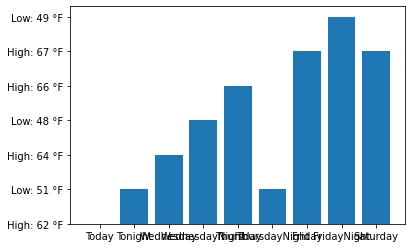

In [28]:
from matplotlib import pyplot as plt 

x = Period_names
y = Temperature

plt.bar(x,y)
plt.show()